# Tiingo-Python


This notebook shows basic usage of the `tiingo-python` library. If you're running this on `mybinder.org`, you can run this code without installing anything on your computer. You can find more information about what available at the [Tiingo website](https://api.tiingo.com/docs/general/overview), but this notebook will let you play around with real code samples in your browser.

If you've never used `jupyter` before, I recommend this [tutorial](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook) from Datacamp.

## Basic Setup

First, you'll need to provide your API key as a string in the cell below. If you forget to do this, the notebook cannot run. You can find your API key by visiting [this link](https://www.tiingo.com/account/api/token) and logging in to your Tiingo account.

In [1]:
TIINGO_API_KEY = 'REPLACE-THIS-TEXT-WITH-A-REAL-API-KEY'

# This is here to remind you to change your API key.
if not TIINGO_API_KEY or (TIINGO_API_KEY == 'REPLACE-THIS-TEXT-WITH-A-REAL-API-KEY'):
    raise Exception("Please provide a valid Tiingo API key!")

In [2]:
from tiingo import TiingoClient

config = {
    'api_key': TIINGO_API_KEY,
    'session': True # Reuse HTTP sessions across API calls for better performance
}

# Throughout the rest of this notebook, you'll use the "client" to interact with the Tiingo backend services.
client = TiingoClient(config)

## Minimal Data Fetching Examples

Below are the code samples from the `README.rst` along with sample outputs, but this is just the tip of the iceberg of this library's capabilities. 

In [3]:
# Get Ticker Metadata for the stock "GOOGL"
ticker_metadata = client.get_ticker_metadata("GOOGL")
print(ticker_metadata)

{'exchangeCode': 'NASDAQ', 'endDate': '2019-01-30', 'startDate': '2004-08-19', 'ticker': 'GOOGL', 'description': "Google Inc. (Google) is a global technology company. The Company's business is primarily focused around key areas, such as search, advertising, operating systems and platforms, enterprise and hardware products. The Company generates revenue primarily by delivering online advertising. The Company also generates revenues from Motorola by selling hardware products. The Company provides its products and services in more than 100 languages and in more than 50 countries, regions, and territories. Effective May 16, 2014, Google Inc acquired Quest Visual Inc. Effective May 20, 2014, Google Inc acquired Enterproid Inc, doing business as Divide. In June 2014, Google Inc acquired mDialog Corp. Effective June 25, 2014, Google Inc acquired Appurify Inc, a San Francisco-based developer of mobile bugging application software.", 'name': 'Alphabet Inc.("Google") - Class A'}


In [4]:
# Get latest prices, based on 3+ sources as JSON, sampled weekly
ticker_price = client.get_ticker_price("GOOGL", frequency="weekly")
print(ticker_price)

[{'adjClose': 1097.99, 'adjHigh': 1099.52, 'adjLow': 1076.64, 'adjOpen': 1077.36, 'adjVolume': 1450619, 'close': 1097.99, 'date': '2019-01-30T00:00:00+00:00', 'divCash': 0.0, 'high': 1099.52, 'low': 1076.64, 'open': 1077.36, 'splitFactor': 1.0, 'volume': 1450619}]


For values of `frequency`:

You can specify any of the end of day frequencies (daily, weekly, monthly, and annually) or any intraday frequency for both the ``get_ticker_price`` and ``get_dataframe`` methods.  Weekly frequencies resample to the end of day on Friday, monthly frequencies resample to the last day of the month, and annually frequencies resample to the end of day on 12-31 of each year.  The intraday frequencies are specified using an integer followed by `Min` or `Hour`, for example `30Min` or `1Hour`.

In [5]:
# Get historical GOOGL prices from August 2017 as JSON, sampled daily
historical_prices = client.get_ticker_price("GOOGL",
                                            fmt='json',
                                            startDate='2017-08-01',
                                            endDate='2017-08-31',
                                            frequency='daily')

# Print the first 2 days of data, but you will find more days of data in the overall historical_prices variable.
print(historical_prices[:2])

[{'date': '2017-08-01T00:00:00.000Z', 'close': 946.56, 'high': 954.49, 'low': 944.96, 'open': 947.81, 'volume': 1205799, 'adjClose': 946.56, 'adjHigh': 954.49, 'adjLow': 944.96, 'adjOpen': 947.81, 'adjVolume': 1205799, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2017-08-02T00:00:00.000Z', 'close': 947.64, 'high': 949.1, 'low': 932.521, 'open': 948.37, 'volume': 2019979, 'adjClose': 947.64, 'adjHigh': 949.1, 'adjLow': 932.521, 'adjOpen': 948.37, 'adjVolume': 2019979, 'divCash': 0.0, 'splitFactor': 1.0}]


In [6]:
# See what tickers are available
# Check what tickers are available, as well as metadata about each ticker
# including supported currency, exchange, and available start/end dates.
tickers = client.list_stock_tickers()

print(tickers[:2])

[OrderedDict([('ticker', '000001'), ('exchange', 'SHE'), ('assetType', 'Stock'), ('priceCurrency', 'CNY'), ('startDate', '2007-08-30'), ('endDate', '2019-01-29')]), OrderedDict([('ticker', '000002'), ('exchange', 'SHE'), ('assetType', 'Stock'), ('priceCurrency', 'CNY'), ('startDate', '2000-01-04'), ('endDate', '2019-01-29')])]


For each ticker, you may access

- `ticker`: The ticker's abbreviation
- `exchange`: Which exchange it's traded on
- `priceCurrency`: Currency for the prices listed for this ticker
- `startDate`/ `endDate`: Start / End Date for Tiingo's data about this ticker

Note that Tiingo is constantly adding new data sources, so the values returned from this call will probably change every day.

In [7]:
# Search news articles about particular tickers
# This method will not work error if you do not have a paid Tiingo account associated with your API key.
articles = client.get_news(tickers=['GOOGL', 'AAPL'],
                           tags=['Laptops'],
                           sources=['washingtonpost.com'],
                           startDate='2017-01-01',
                           endDate='2017-08-31')

In [8]:
# Display a sample article
articles[0]

{'publishedDate': '2018-10-30T19:33:13Z',
 'crawlDate': '2018-10-30T19:49:31.438654Z',
 'title': 'It’s not clear which MacBook laptop to buy anymore',
 'url': 'https://qz.com/1444562/which-macbook-should-you-get-any-of-them/',
 'description': 'Which new Apple MacBook should you get? Maybe an iPad.',
 'id': 13583735,
 'tags': ['Apple',
  'Apple October Event',
  'Edited By Matt Quinn',
  'Gadgets',
  'Information Technology',
  'Laptops',
  'Macbook',
  'Macbook Air',
  'Macbook Pro',
  'Stock',
  'Technology'],
 'tickers': ['aapl'],
 'source': 'qz.com'}

## Basic Pandas Dataframe Examples

Pandas is a popular python library for data analysis an manipulation. We provide out-of-the-box support for returning responses from Tiingo as Python Dataframes. If you are unfamiliar with `pandas`, I recommend the `Mode Notebooks` [python data analysis tutorial](https://mode.com/python-tutorial/).

In [9]:
# Boilerplate to make pandas charts render inline in jupyter
import matplotlib.pyplot as plt
%matplotlib inline  

In [10]:
# Scan some historical Google data
ticker_history_df = client.get_dataframe("GOOGL",
                                         startDate='2018-05-15',
                                         endDate='2018-05-31',
                                         frequency='daily')

In [11]:
# Check which columns you'd like to work with
ticker_history_df.columns

Index(['adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'close',
       'divCash', 'high', 'low', 'open', 'splitFactor', 'volume'],
      dtype='object')

In [12]:
# Browse the first few entries of the raw data
ticker_history_df.head(5)

,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume
date,,,,,,,,,,,,
2018-05-15 00:00:00+00:00,1084.87,1099.12,1078.78,1096.90,1786926,1084.87,0.0,1099.12,1078.78,1096.90,1.0,1786926
2018-05-16 00:00:00+00:00,1084.09,1094.38,1081.63,1085.09,1281406,1084.09,0.0,1094.38,1081.63,1085.09,1.0,1281406
2018-05-17 00:00:00+00:00,1081.26,1091.00,1076.42,1081.46,1286907,1081.26,0.0,1091.00,1076.42,1081.46,1.0,1286907
2018-05-18 00:00:00+00:00,1069.64,1073.73,1064.68,1066.00,1774149,1069.64,0.0,1073.73,1064.68,1066.00,1.0,1774149
2018-05-21 00:00:00+00:00,1084.01,1093.30,1078.00,1079.00,1258999,1084.01,0.0,1093.30,1078.00,1079.00,1.0,1258999


array([<matplotlib.axes._subplots.AxesSubplot object at 0x126e7e240>,
      dtype=object)

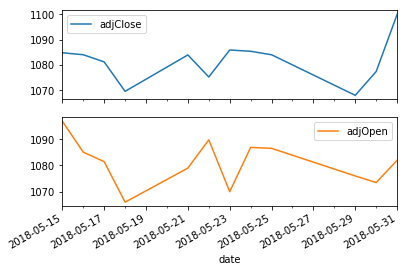

In [13]:
# View your columns of data on separate plots
columns_to_plot = ['adjClose', 'adjOpen']
ticker_history_df[columns_to_plot].plot.line(subplots=True)

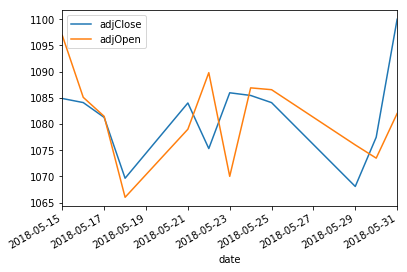

In [14]:
# Plot multiple columns of data in the same chart
ticker_history_df[columns_to_plot].plot.line(subplots=False)

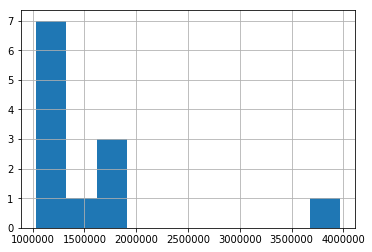

In [15]:
# Make a histogram to see what typical trading volumes are
ticker_history_df.volume.hist()

In [ ]:
# You may also fetch data for multiple tickers at once, as long as you are only interested in 1 metric
# at a time. If you need to compare multiple metrics, you must fetch the data 1 
# Here we compare Google with Apple's trading volume.
multiple_ticker_history_df = client.get_dataframe(['GOOGL', 'AAPL'],
                                                  frequency='weekly',
                                                  metric_name='volume',
                                                  startDate='2018-01-01',
                                                  endDate='2018-07-31')

/Users/cameron/.pyenv/versions/3.7.1/envs/jupyter3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


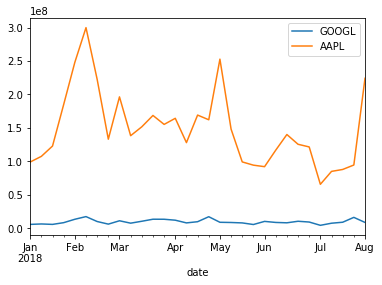

In [17]:
# Compare the companies: AAPL's volume seems to be much more volatile in the first half of 2018.
multiple_ticker_history_df.plot.line()

You now have all the tools you need to access the data! We look forward to seeing what you will make with `Tiingo`